## Hello (noteboek geinspireert door Kaggle aangepast door Ferry !!)
### V25
Dit notebook en een vliegende start in data-analyse en machinelearning. Plaats dit bestand samen met de CSV file in de map Bootcamp/Dag3.
dan:

$ git add Pima_v25.ipynb diabetes.csv

$ git commit -m "EIGEN BERICHT"

$ git push


## Een AI/Datascience project doorloop altijd de volgende stappen:

1)Feature Selection

2)Medianl selection

3)Input validation

4)Voorspellen

5)Validatie door confusion

6)Selectie medianl

5)Gradio webinterface naar diagnostic tool op basis van gekozen medianl


## Vraag 1

Om een systeem te kunnen bouwen en testen is enige domeinkennis absoluut noodzakelijk, bekijk de volgende vragen en beantwoord ze in de volgende cel.

Beantwoorden in de volgende cel:
- Wat is diabetes?
- Hoe krijg je het?
- Zijn er verschillende soorten?
- Wat zijn de gevolgen?
- Hoe wordt het gediagnostiseerd?
- Hoe wordt het behandeld?

## Tot slot;
ChatGPT/Google/Bing kunnen op alle vragen een antwoord geven, het gaat niet om het antwoord het doel is
begrip te krijgen in het domein. Zoek het op vat samen en maak de begrippen voor je zelf duidelijk.

#### Cell 2 Ken je domein zodat je de data kan evalueren: max 20 min

###V1:
Diabetes is een ziekte waarbij de lichaam problemen heeft bij het productie van insuline.

### V2:
Om te begrijpen hoe je diabetes krijgt moet je eerst kijken naar de 2 soorten. Je hebt diabetes 1 en 2. Voor diabetes 1 is het niet altijd heel duidelijk hoe het ontstaat, maar grootste oorzaken die het beinvloeden zijn erfing en omgeving.
-
Bij diabetes 2 zijn er meerdere oorzaken zoals:
    - Overschot aan buikvet
    - Erfelijkheid
    - Leeftijd
    - Weinig lichaamsbeweging

### V3:
Ja je hebt diabetes type 1 en 2, bij vraag 2 staat het beter uitgelegd.

### V4
Er zijn heelveel gevolgen van diabetes, in de dagelijks leven moet je op je bloedsuiker hoeveelheid letten, insuline spuiten en letten op wat je eet. De fysieke effecten zijn zo lang dat ik maar een paar op noem. Laag energie, hoog energie, hart problemen, amputaties etc..

### V5
Er zijn meerdere manieren om diabetes te testen. Je kan zelfs de urine proeven van iemand met diabetes, en als het zoet is weet je het. Maar met medianrne medicijn kijken ze naar bloedsuiker testen.

### V6
Insuline bijnemen, en letten op de dieet.



















## Terug naar de les deel 2.

In [64]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


In [65]:
data = pd.read_csv('diabetes.csv')

diab = pd.DataFrame(data)
print("Amount of records: ", + diab.describe())

print("Ik vermoed van wel")


Amount of records:         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0000

In [66]:
# Calculate medians
bloodPressureMedian = diab["BloodPressure"].median()
skinThicknessMedian = diab["SkinThickness"].median()
insulinMedian = diab["Insulin"].median()
bmiMedian = diab["BMI"].median()
glucoseMedian = diab["Glucose"].median()
diab["somecolumn"] = diab["Outcome"].astype(bool)

# Replace 0 values with medians in the original DataFrame
diab["BloodPressure"] = diab["BloodPressure"].replace(0, bloodPressureMedian)
diab["SkinThickness"] = diab["SkinThickness"].replace(0, skinThicknessMedian)
diab["Insulin"] = diab["Insulin"].replace(0, insulinMedian)
diab["BMI"] = diab["BMI"].replace(0, bmiMedian)
diab["Glucose"] = diab["Glucose"].replace(0, glucoseMedian)

diab.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [67]:
# test 2 (b.v nan waarden)
column_nan_count = diab.isnull().sum()
print(column_nan_count)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
somecolumn                  0
dtype: int64


In [68]:
# test 3 (Wat kan je nog meer testen)

# Testing the amount of zeros
num = 0
for i in diab.columns:
    zero_count = (diab[i] == 0).sum()
    if zero_count > 0:
        print(f"Column '{i}' has {zero_count} zero(s).")
        num += zero_count

print(f"Total number of zeros: {num}")


Column 'Pregnancies' has 111 zero(s).
Column 'Outcome' has 500 zero(s).
Column 'somecolumn' has 500 zero(s).
Total number of zeros: 1111


In [69]:
# Vervang 0 and NaN waarden.
diab["Insulin"] = diab["Pregnancies"].fillna(0)




In [70]:
# Counting the amount of diabetics vs non diabetics
diabetics = diab["Outcome"].value_counts().get(1)
nonDiabetics = diab["Outcome"].value_counts().get(0)

print("The amount of diabetics is:",diabetics,"\n",
      "No I don't believe it's an issue, because if it had no difference you wouldn't be able to predict what causes it.","\n",
"Them percentage of Diabetics: ",diabetics*100 / (diabetics + nonDiabetics))



The amount of diabetics is: 268 
 No I don't believe it's an issue, because if it had no difference you wouldn't be able to predict what causes it. 
 Them percentage of Diabetics:  34.895833333333336


## Terug naar de les derde deel.

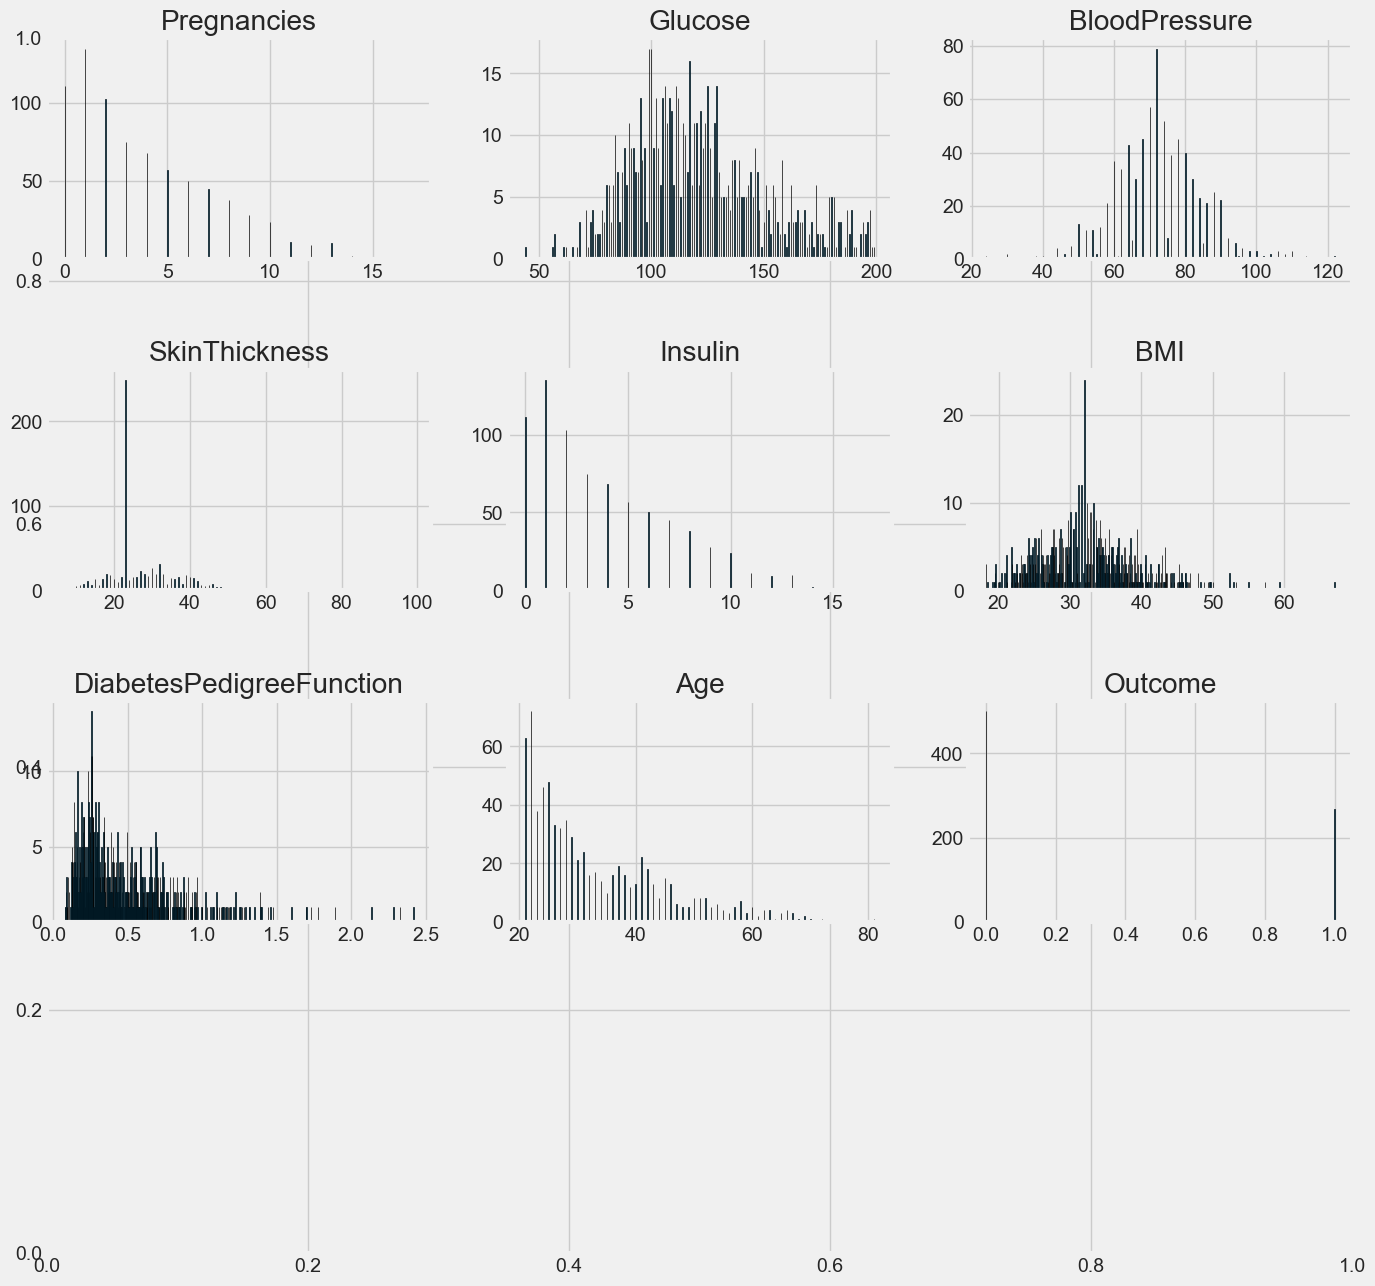

In [71]:
columns=diab.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=763,edgecolor='black')
    plt.title(i)
plt.show()


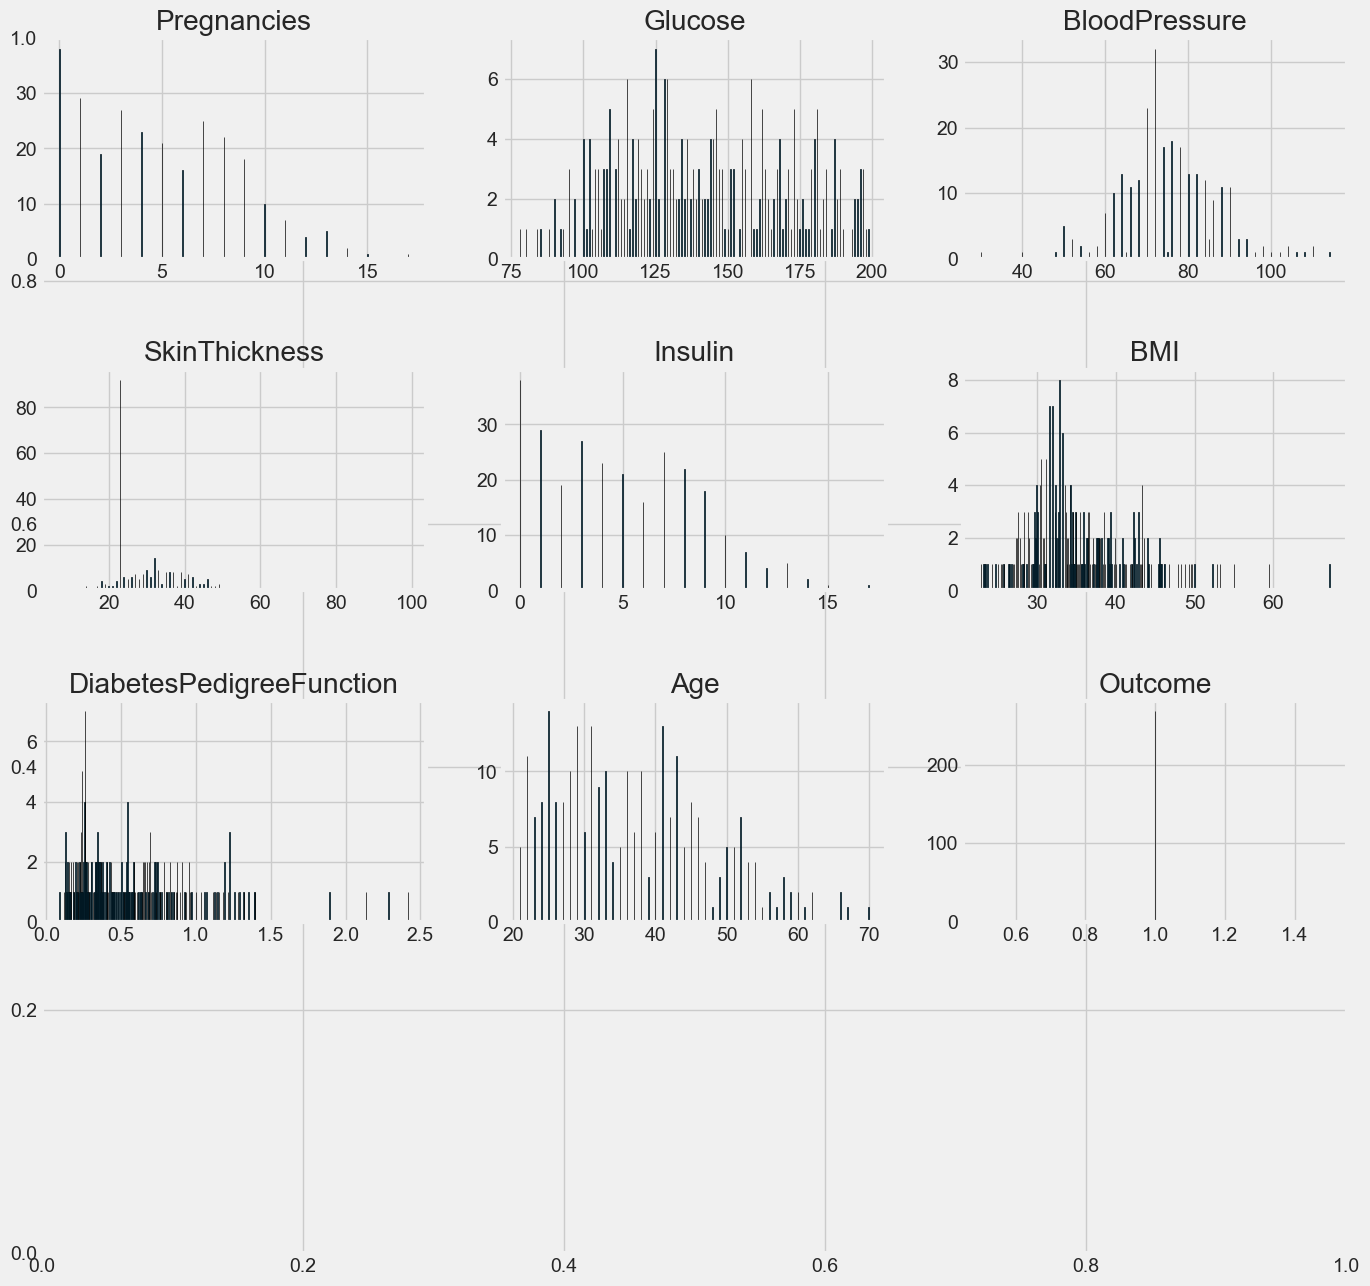

In [72]:
diabeticsResult = diab.query("Outcome == 1")

columns=diabeticsResult.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diabeticsResult[i].hist(bins=763,edgecolor='black')
    plt.title(i)
plt.show()


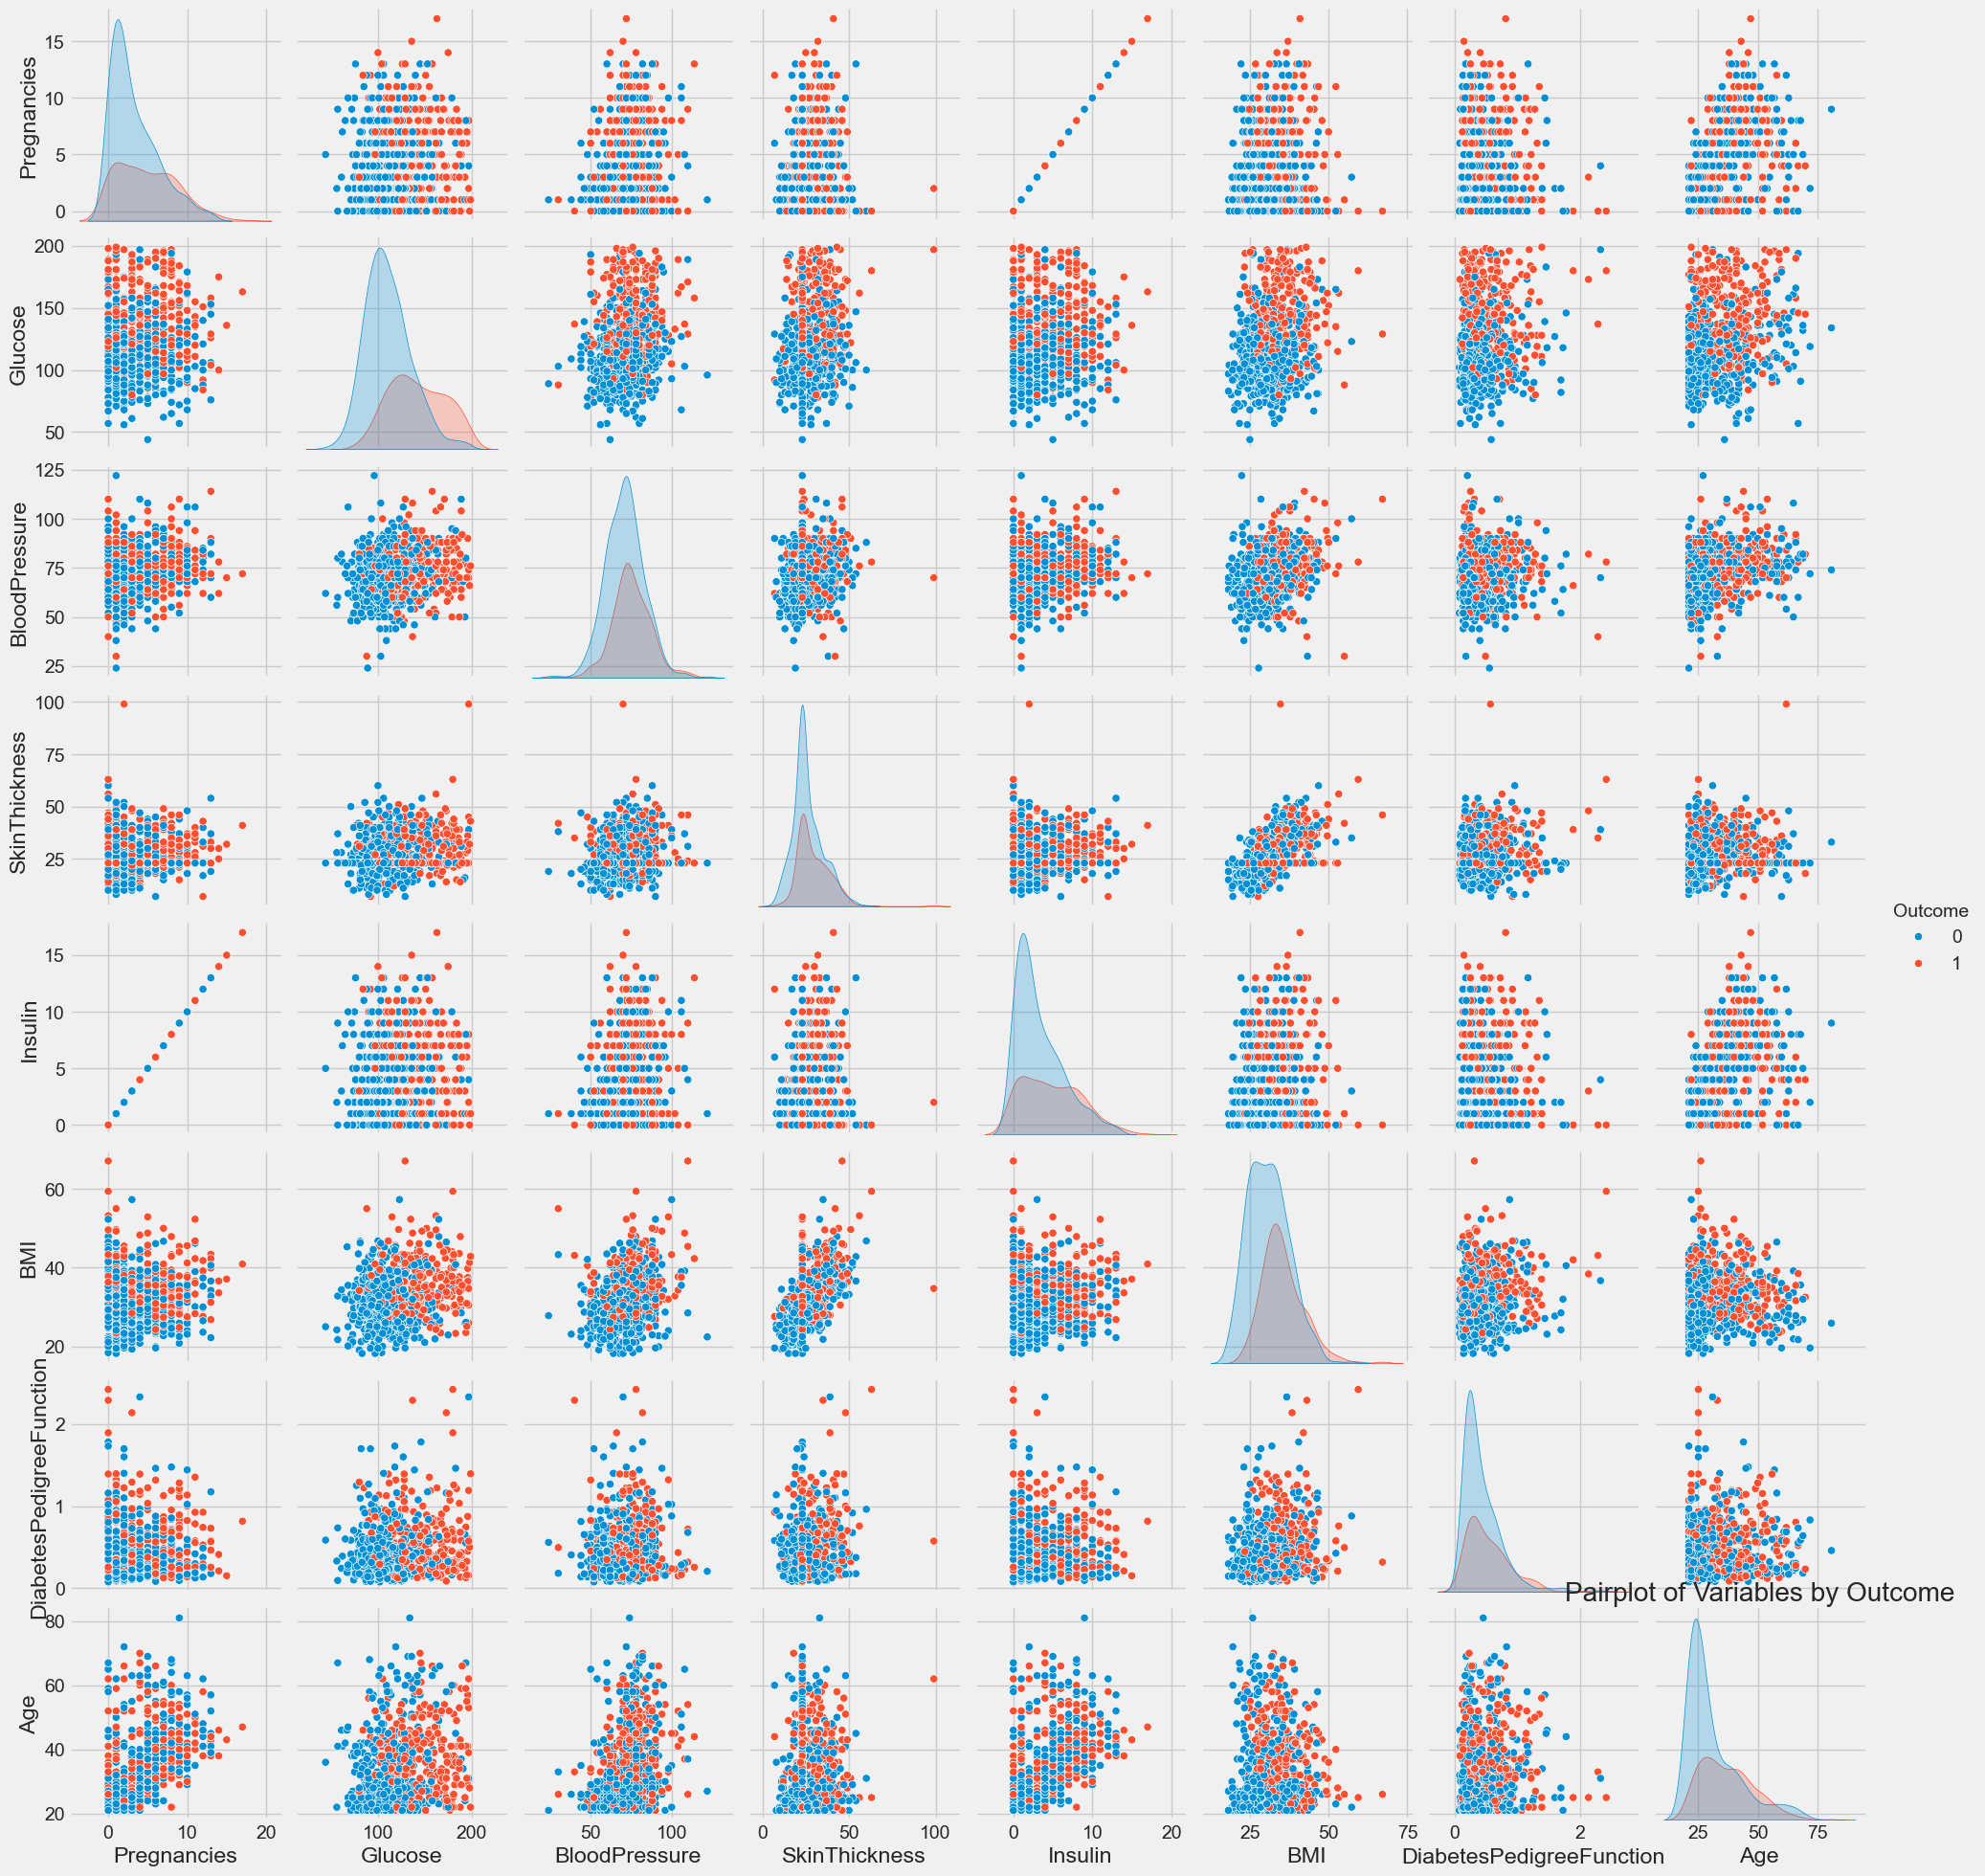

In [73]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [20, 20]

sns.pairplot(diab, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

plt.show()

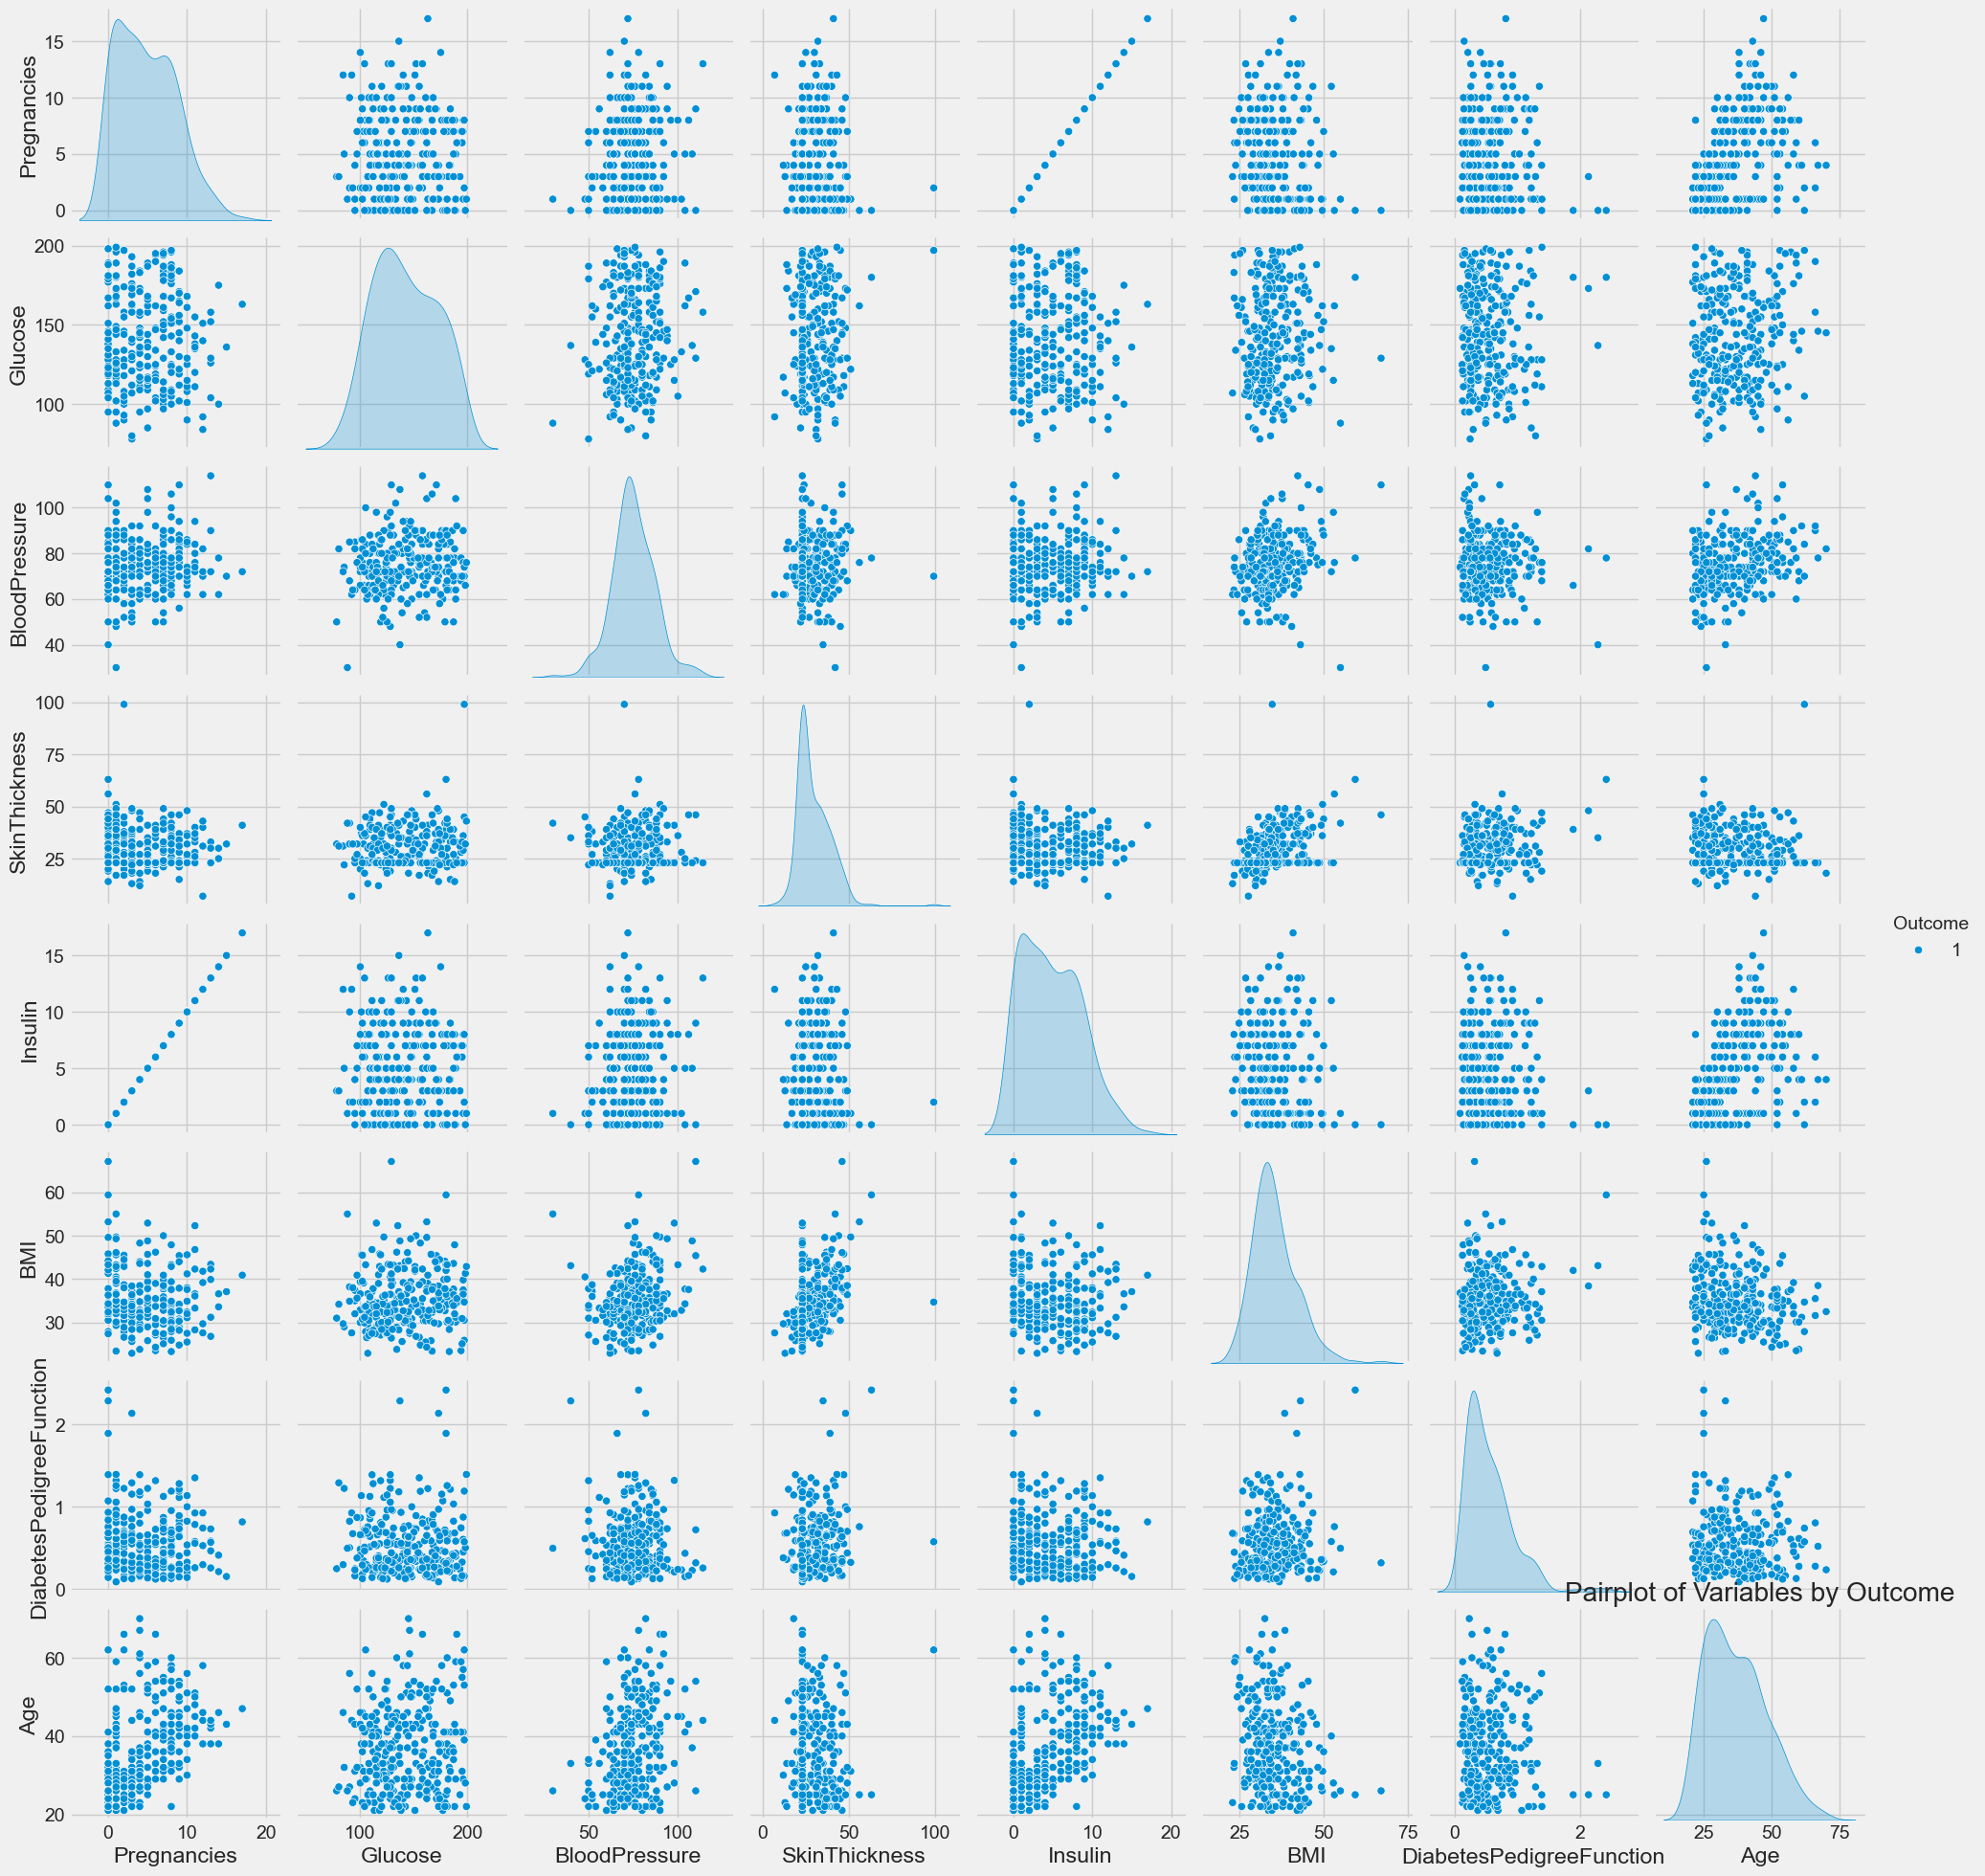

In [74]:
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [20, 20]

sns.pairplot(diabeticsResult, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

plt.show()

In [44]:
diab.corr()['Glucose']

Pregnancies                 0.128213
Glucose                     1.000000
BloodPressure               0.218937
SkinThickness               0.172143
Insulin                     0.128213
BMI                         0.231400
DiabetesPedigreeFunction    0.137327
Age                         0.266909
Outcome                     0.492782
somecolumn                  0.492782
Name: Glucose, dtype: float64

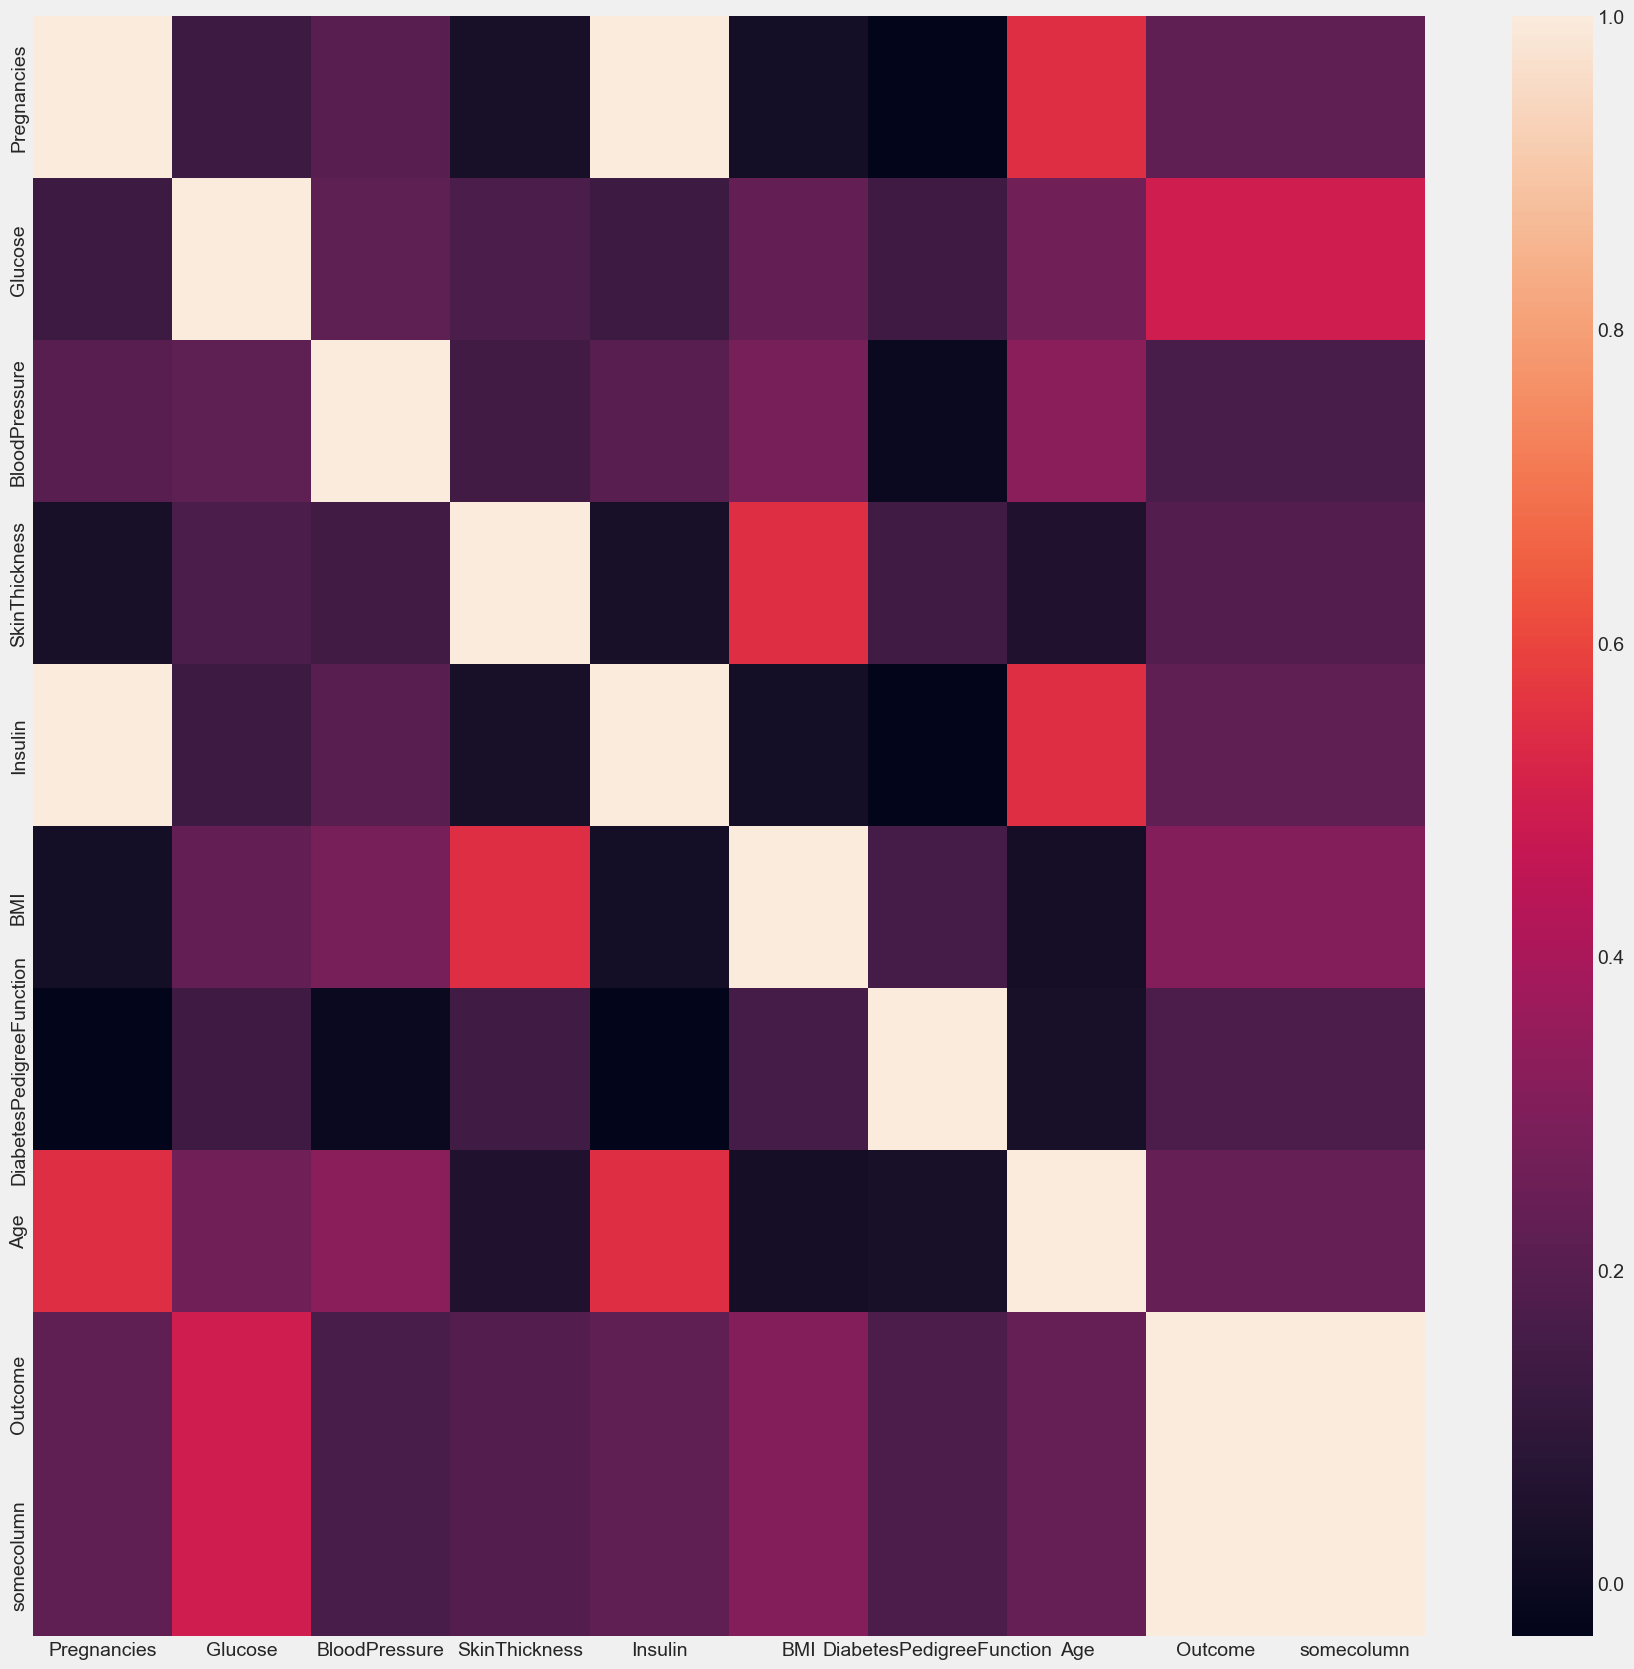

In [45]:
# Heatmap

sns.heatmap(diab.corr());





## Terug naar de les deel 4.

In [46]:
# Importeen aantal standaard systeem voor machine-learning gebruik pip om de ontbrekende modules te installeren.

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [47]:
# De code hieronder is absuluut noodzakelijk voor een ML training.
# Er staat wel een regel teveel!, wat kan weg?
# Answer: Regel 5

outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [48]:
train_X.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
432            1       80             74             11        1  30.0   
453            2      119             72             23        2  19.6   
706           10      115             72             23       10  32.0   
606            1      181             78             42        1  40.0   
118            4       97             60             23        4  28.2   

     DiabetesPedigreeFunction  Age  
432                     0.527   22  
453                     0.832   72  
706                     0.261   30  
606                     1.258   22  
118                     0.443   22

In [49]:
train_Y.head(5)

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

In [50]:
from sklearn import svm
from sklearn import metrics

types = ['rbf', 'linear']
for i in types:
    medianl = svm.SVC(kernel=i)
    medianl.fit(train_X, train_Y)
    prediction = medianl.predict(test_X)
    print('Accuracy for SVM kernel=', i, 'is', metrics.accuracy_score(prediction, test_Y))

Accuracy for SVM kernel= rbf is 0.7552083333333334
Accuracy for SVM kernel= linear is 0.7604166666666666


In [51]:
medianl = LogisticRegression()
medianl.fit(train_X,train_Y)
prediction=medianl.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.7604166666666666


## Vraag: Welk medianl van de drie geeft het beste resultaat?

Answer: Logistic Regression


## Vraag: Als je van de drie medianlen de confusion matrices naast elkaar zet welke kies je dan als beste? 



Answer: I believe LogisticRegression

In [76]:
medianl=DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)

# Make predictions
predictions = model.predict(test_X)

# Calculate accuracy
accuracy = metrics.accuracy_score(test_Y, predictions)
print('The accuracy of the Decision Tree classifier is', accuracy)




The accuracy of the Decision Tree classifier is 0.7135416666666666


### Alle systemen op een rijtje.


In [22]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
medianls=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in medianls:
    medianl = i
    medianl.fit(train_X,train_Y)
    prediction=medianl.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
medianls_dataframe=pd.DataFrame(abc,index=classifiers)   
medianls_dataframe.columns=['Accuracy']
medianls_dataframe

Accuracy
Linear Svm           0.760417
Radial Svm           0.755208
Logistic Regression  0.760417
KNN                  0.723958
Decision Tree        0.713542

De bovenstaande algoritmen geven geen erg hoge nauwkeurigheid. Dit kan worden verbeterd door attributeselectie te gebruiken en alleen relevante kolommen te gebruiken. We kunnen ook gebruik maken van ensembling of middeling van verschillende algoritmen.

## Vraag: Wat is ensembling?


Answer: Ensembling is a machine learning technique that aggregates two or more learners. Or more simply said utilization of different methods/models for training to produce a better result.

In [24]:
test_Y.describe()

count    192.000000
mean       0.348958
std        0.477887
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

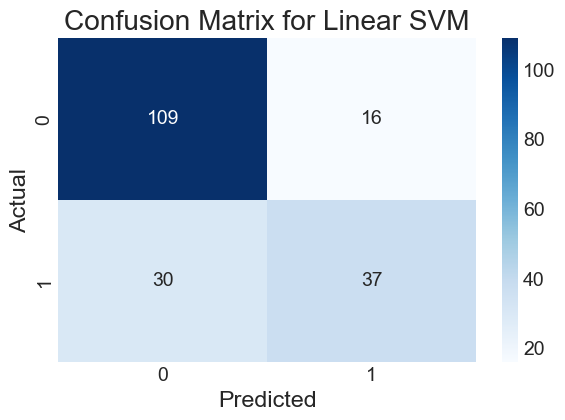

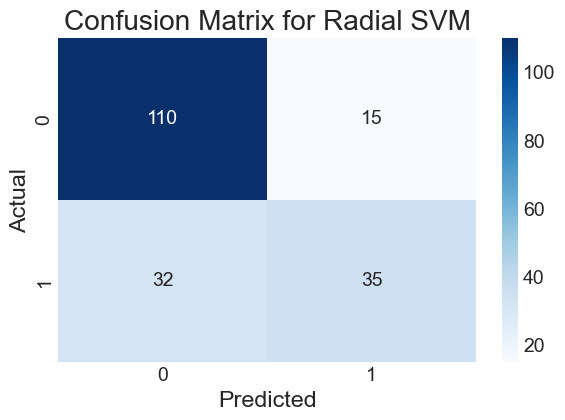

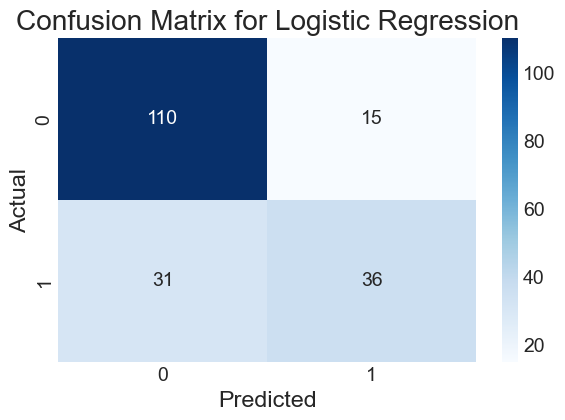

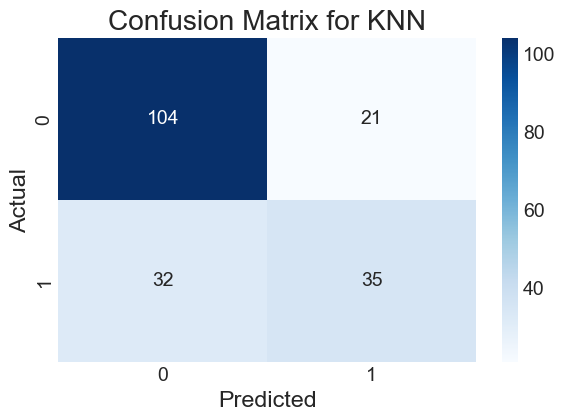

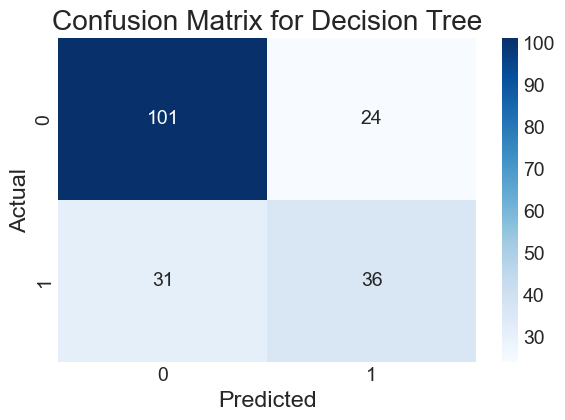

In [31]:
#  Confusion matrix.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classifiers
classifiers = {
    'Linear SVM': svm.SVC(kernel='linear'),
    'Radial SVM': svm.SVC(kernel='rbf'),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and predict with each classifier, then plot the confusion matrix
for name, clf in classifiers.items():
    clf.fit(train_X, train_Y)
    predictions = clf.predict(test_X)
    cm = confusion_matrix(test_Y, predictions)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()







## Feature Extraction/ Selection:

- Veel attributen beïnvloeden de nauwkeurigheid van het algoritme.

- Feature extractie betekent dat je alleen de belangrijkste attributen selecteert om de nauwkeurigheid te verbeteren. 

- Selectie van de belangrijkste attributen verkleint de kans op overfitting en versnelt de training.

- Je kan op twee manieren de belangrijkste attributen selecteren:
 - Via de correlatie matrix en dan de attributen met een lage onderlinge correlatie bewaren/schrappen
 - Via een RandomforestClassifier deze geeft het belang van de attributen aan.



In [26]:
from sklearn.ensemble import RandomForestClassifier 
medianl= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
medianl.fit(X,Y)
pd.Series(medianl.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.260048
BMI                         0.166631
Age                         0.138534
DiabetesPedigreeFunction    0.131229
BloodPressure               0.092063
SkinThickness               0.084746
Pregnancies                 0.066526
Insulin                     0.060224
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Ga nu terug naar je correlatie matrix en kies de 5 attributen met de laagste onderlinge correlatie en vergelijk deze met de top 5 van de RandomForestClassifier?


Verschil:
- Insulin
- Age
- DiabetesPedigreeFunction
- Pregnancies


Overeenkomst:
- BMI
- Age
- DiabetesPedigreeFunction
- BloodPressure



### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes en geef aan waarop je dat baseert?

Antwoord:
- BMI
- Age
- Insulin

Why?: I've based these top 3 on what I've learned on the internet about diabetes, and what the data has shown patterns in.

### Tot slot: 
Gezien de resultaten van de voorspellingen zou je een systeem van ML advisreen om disgnose te stellen of iemand diabetes heeft of niet


### Tot slot maak een webapp met je beste medianl in gradio?


### Als je het notebook download als Python heb je een complete webapp

In [27]:
from sklearn.ensemble import RandomForestClassifier 

medianl = RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
medianl.fit(X,Y)


RandomForestClassifier(random_state=0)

In [78]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Train a RandomForestClassifier model (assuming the model is not already trained and saved)
X = data.drop('Outcome', axis=1)
y = data['Outcome']
model = RandomForestClassifier()
model.fit(X, y)

# Save the trained model
joblib.dump(model, 'RandomForest.pkl')

# Load the trained RandomForest model
model = joblib.load('RandomForest.pkl')

# Define the prediction function
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_data = pd.DataFrame([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]],
                              columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    prediction = model.predict(input_data)[0]
    return "Diabetic" if prediction == 1 else "Not Diabetic"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Pregnancies"),
        gr.Number(label="Glucose"),
        gr.Number(label="BloodPressure"),
        gr.Number(label="SkinThickness"),
        gr.Number(label="Insulin"),
        gr.Number(label="BMI"),
        gr.Number(label="DiabetesPedigreeFunction"),
        gr.Number(label="Age")
    ],
    outputs="text",
    title="Diabetes Prediction",
    description="Enter the values to predict if a person is diabetic or not."
)

# Launch the interface
if __name__ == "__main__":
    interface.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
